In [ ]:
!pip install split_folders


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/ML LAB

[Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/ML LAB'
/content


In [ ]:
!ls

drive  sample_data


In [ ]:
!unzip archive.zip

In [ ]:
import splitfolders
splitfolders.ratio("/content/drive/MyDrive/Colab Notebooks/ML_LAB/covid_dataset/COVID", output="/content/drive/MyDrive/Colab Notebooks/ML_LAB/covid_dataset/split", seed=1337, ratio=(.8, .1, .1), group_prefix=None)

Copying files: 7232 files [01:40, 71.92 files/s]


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Normalize training and validation data in the range of 0 to 1
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Read the training sample and set the batch size 
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/ML_LAB/covid_dataset/split/train/',
        target_size=(128, 128),
        batch_size=8,
        seed=100,
        class_mode='categorical')

# Read Validation data from directory and define target size with batch size
validation_generator = validation_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/ML_LAB/covid_dataset/split/val/',
        target_size=(128, 128),
        batch_size=8,
        class_mode='categorical',
        seed=1000,
        shuffle=False)

test_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/ML_LAB/covid_dataset/split/test/',
        target_size=(128, 128),
        batch_size=8,
        seed=500,
        class_mode='categorical',
        shuffle=False)

Found 5784 images belonging to 2 classes.
Found 722 images belonging to 2 classes.
Found 726 images belonging to 2 classes.


Model building

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(128, 128,3))
x = layers.Flatten()(inputs)
x = layers.Dense(32, activation="relu")(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(3, activation="softmax")(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 flatten (Flatten)           (None, 49152)             0         
                                                                 
 dense (Dense)               (None, 32)                1572896   
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 1,575,203
Trainable params: 1,575,203
Non-trainable params: 0
_________________________________________________________________


In [ ]:
! pip install tensorflow

     |████████████████████████████████| 462 kB 8.8 MB/s 


**Model Compilation and Training**

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
adam = Adam(learning_rate=0.0001)
# We are going to use accuracy metrics and cross entropy loss as performance parameters
model.compile(adam, loss='categorical_crossentropy', metrics=['acc'])
# Train the model 
history = model.fit(train_generator, 
      steps_per_epoch=train_generator.samples/train_generator.batch_size,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

Epoch 1/100
15/15 [==============================] - 3s 41ms/step - loss: 1.2026 - acc: 0.3750 - val_loss: 1.0798 - val_acc: 0.3333
Epoch 2/100
15/15 [==============================] - 0s 32ms/step - loss: 0.7964 - acc: 0.6417 - val_loss: 0.6724 - val_acc: 0.6667
Epoch 3/100
15/15 [==============================] - 0s 30ms/step - loss: 0.6634 - acc: 0.7000 - val_loss: 0.5862 - val_acc: 0.8000
Epoch 4/100
15/15 [==============================] - 0s 30ms/step - loss: 0.6013 - acc: 0.7667 - val_loss: 0.6914 - val_acc: 0.6667
Epoch 5/100
15/15 [==============================] - 0s 28ms/step - loss: 0.5565 - acc: 0.7417 - val_loss: 0.4563 - val_acc: 0.8667
Epoch 6/100
15/15 [==============================] - 0s 29ms/step - loss: 0.4902 - acc: 0.8083 - val_loss: 0.6879 - val_acc: 0.6000
Epoch 7/100
15/15 [==============================] - 0s 29ms/step - loss: 0.5412 - acc: 0.7833 - val_loss: 0.5254 - val_acc: 0.7333
Epoch 8/100
15/15 [==============================] - 0s 29ms/step - loss: 0.

In [ ]:
model.save('covid_classification.h5')

**10. Model loading**

In [ ]:
from tensorflow.keras import models
model = models.load_model('covid_classification.h5')

**11. Model weights saving**

In [ ]:
model.save_weights('covid_classification_weights.h5')

**12. Model weights loading**

In [ ]:
model.load_weights('covid_classification_weights.h5')

**13. Plotting accuracy and loss graph for training and validation dataset**

In [ ]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

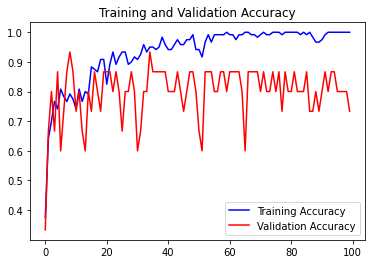

<Figure size 432x288 with 0 Axes>

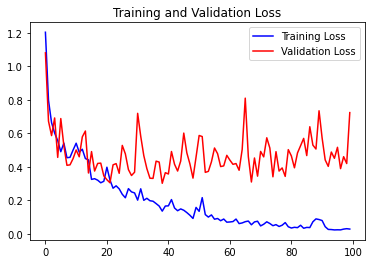

In [ ]:
import matplotlib.pyplot as plt
epochs = range(len(train_acc)) 
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


**14. Evaluate model performance on test dataset**

In [ ]:
test_output= model.evaluate(test_generator, steps=test_generator.samples/test_generator.batch_size, verbose=1)
print(test_output)
print(model.metrics_names)

1/1 [==============================] - 0s 28ms/step - loss: 0.9602 - acc: 0.8000
[0.9601898193359375, 0.800000011920929]
['loss', 'acc']
